# Basic FIS - Modify to achieve the required outcomes


In [14]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

"""# keep the input & output labels unchanged """
waitingTraffic = ctrl.Antecedent(np.arange(1, 100, 1), "waiting")
incomingTraffic = ctrl.Antecedent(np.arange(0, 100, 1), "incoming")

waitingDuration = ctrl.Consequent(np.arange(0, 120, 1), "wait duration")
openDuration = ctrl.Consequent(np.arange(0, 120, 1), "open duration")

c:\Users\ajult\.conda\envs\py310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


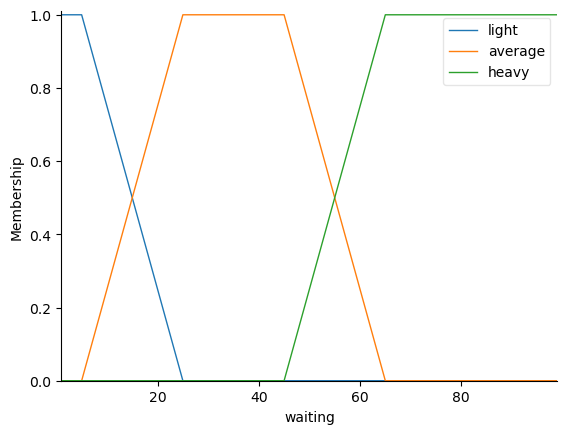

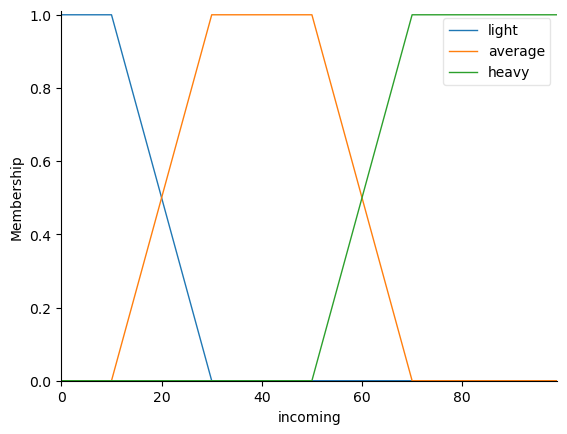

In [16]:
# fuzzySetNamesTraffic = ["light", "average", "heavy"]
# waitingTraffic.automf(names=fuzzySetNamesTraffic)
# incomingTraffic.automf(names=fuzzySetNamesTraffic)
# waitingTraffic.view()
# incomingTraffic.view()

# lets add trapezoidal membership functions
waitingTraffic["light"] = fuzz.trapmf(waitingTraffic.universe, [1, 1, 5, 25])
waitingTraffic["average"] = fuzz.trapmf(waitingTraffic.universe, [5, 25, 45, 65])
waitingTraffic["heavy"] = fuzz.trapmf(waitingTraffic.universe, [45, 65, 100, 100])
incomingTraffic["light"] = fuzz.trapmf(incomingTraffic.universe, [0, 0, 10, 30])
incomingTraffic["average"] = fuzz.trapmf(incomingTraffic.universe, [10, 30, 50, 70])
incomingTraffic["heavy"] = fuzz.trapmf(incomingTraffic.universe, [50, 70, 100, 100])
waitingTraffic.view()
incomingTraffic.view()

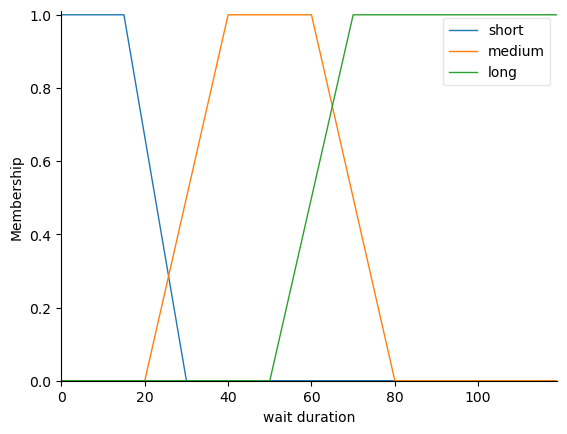

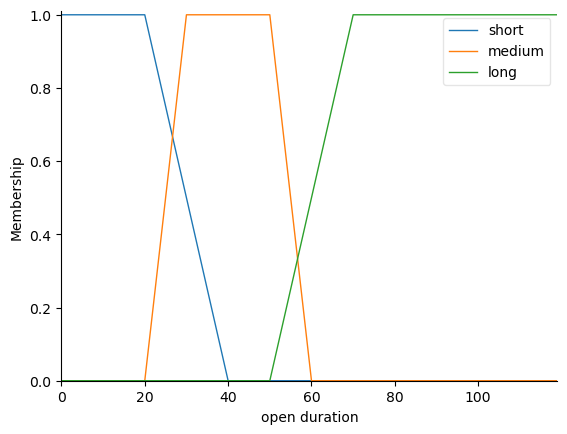

In [17]:
# fuzzySetNamesDuration = ["short", "medium", "long"]
# waitingDuration.automf(names=fuzzySetNamesDuration)
# openDuration.automf(names=fuzzySetNamesDuration)
# waitingDuration.view()
# openDuration.view()

waitingDuration["short"] = fuzz.trapmf(waitingDuration.universe, [0, 0, 15, 30])
waitingDuration["medium"] = fuzz.trapmf(waitingDuration.universe, [20, 40, 60, 80])
waitingDuration["long"] = fuzz.trapmf(waitingDuration.universe, [50, 70, 120, 120])
openDuration["short"] = fuzz.trapmf(openDuration.universe, [0, 0, 20, 40])
openDuration["medium"] = fuzz.trapmf(openDuration.universe, [20, 30, 50, 60])
openDuration["long"] = fuzz.trapmf(openDuration.universe, [50, 70, 120, 120])
waitingDuration.view()
openDuration.view()

In [18]:
# rule1 = ctrl.Rule(
#     incomingTraffic["light"] & waitingTraffic["light"],
#     [waitingDuration["short"], openDuration["short"]],
# )

# rule2 = ctrl.Rule(
#     incomingTraffic["light"] & waitingTraffic["average"],
#     [waitingDuration["short"], openDuration["medium"]],
# )

# rule3 = ctrl.Rule(
#     incomingTraffic["light"] & waitingTraffic["heavy"],
#     [waitingDuration["short"], openDuration["long"]],
# )


# rule4 = ctrl.Rule(
#     incomingTraffic["average"] & waitingTraffic["light"],
#     [waitingDuration["medium"], openDuration["short"]],
# )

# rule5 = ctrl.Rule(
#     incomingTraffic["average"] & waitingTraffic["average"],
#     [waitingDuration["medium"], openDuration["medium"]],
# )

# rule6 = ctrl.Rule(
#     incomingTraffic["average"] & waitingTraffic["heavy"],
#     [waitingDuration["medium"], openDuration["long"]],
# )


# rule7 = ctrl.Rule(
#     incomingTraffic["heavy"] & waitingTraffic["light"],
#     [waitingDuration["long"], openDuration["short"]],
# )

# rule8 = ctrl.Rule(
#     incomingTraffic["heavy"] & waitingTraffic["average"],
#     [waitingDuration["long"], openDuration["medium"]],
# )

# rule9 = ctrl.Rule(
#     incomingTraffic["heavy"] & waitingTraffic["heavy"],
#     [waitingDuration["long"], openDuration["long"]],
# )

In [19]:
rule1 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["light"],
    [waitingDuration["short"], openDuration["short"]],
)


rule2 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["average"],
    [waitingDuration["short"], openDuration["medium"]],
)


rule3 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["heavy"],
    [waitingDuration["short"], openDuration["long"]],
)


rule4 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["light"],
    [waitingDuration["medium"], openDuration["short"]],
)


rule5 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["average"],
    [waitingDuration["medium"], openDuration["medium"]],
)


rule6 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["heavy"],
    [waitingDuration["medium"], openDuration["long"]],
)


rule7 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["light"],
    [waitingDuration["long"], openDuration["short"]],
)


rule8 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["average"],
    [waitingDuration["long"], openDuration["medium"]],
)


rule9 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["heavy"],
    [waitingDuration["long"], openDuration["long"]],
)

In [20]:
waitingDuration.defuzzify_method = "centroid"
openDuration.defuzzify_method = "centroid"

fis = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
)
fis_simulator = ctrl.ControlSystemSimulation(fis)

# This is how yo can test your FIS


Mean waiting time - main street 246.71030024691362
Mean waiting time - side street 40.47207652173913


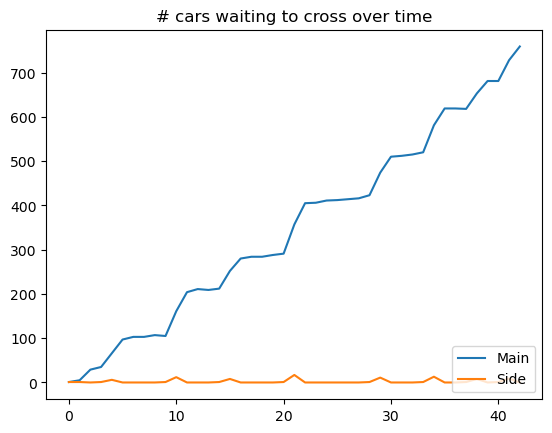

In [21]:
import trafficSimulator

num_cars_on_main, num_cars_on_side, wait_times_main, wait_times_side = (
    trafficSimulator.simulate(fis_simulator, verbose=False)
)

print("Mean waiting time - main street", np.mean(wait_times_main))
print("Mean waiting time - side street", np.mean(wait_times_side))
plt.plot(num_cars_on_main)
plt.plot(num_cars_on_side)
plt.legend(["Main", "Side"], loc="lower right")
plt.title("# cars waiting to cross over time")
plt.show()

In [22]:
num_cars_on_main

[1,
 5,
 29,
 35,
 66,
 97,
 103,
 103,
 107,
 105,
 161,
 204,
 211,
 209,
 212,
 252,
 280,
 284,
 284,
 288,
 291,
 357,
 405,
 406,
 411,
 412,
 414,
 416,
 423,
 474,
 510,
 512,
 515,
 520,
 581,
 619,
 619,
 618,
 653,
 681,
 681,
 728,
 759]

In [25]:
# create a pandas dataframe from four lists
import pandas as pd

df = pd.DataFrame(
    list(zip(num_cars_on_main, num_cars_on_side, wait_times_main, wait_times_side)),
    columns=["num_cars_main", "num_cars_side", "wait_times_main", "wait_times_side"],
)

In [26]:
df.shape

(43, 4)

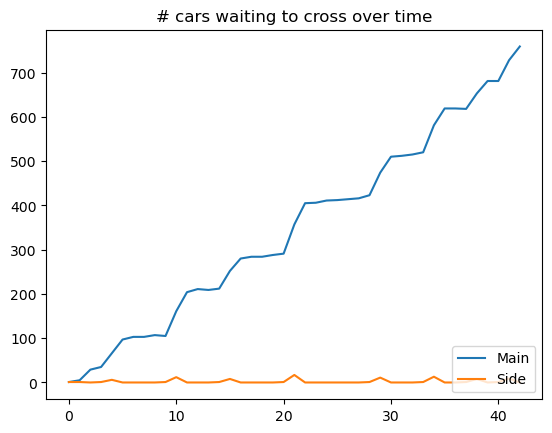

In [27]:
# plot the data in line plots
plt.plot(df["num_cars_main"])
plt.plot(df["num_cars_side"])
plt.legend(["Main", "Side"], loc="lower right")
plt.title("# cars waiting to cross over time")
plt.show()